In [1]:
import numpy as np
import os
os.chdir('/Users/wty6162/Desktop/DRO_solver')
from dro.src.linear_model.Wasserstein_DRO import *



# Classification Task

## Load Data

In [2]:
from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)
# draw_classification(X, y, title = 'Raw Data')

## Model Fit

In [12]:
clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'svm')
clf_model1.fit_intercept = False
clf_model1.update({'eps': 1, 'p': 'inf', 'kappa': 10})
clf_model1.fit(X, y)

{'theta': [-0.027927464931475895, 0.33540663380376556], 'b': 0}

## Worst-case Distribution and Visualization
For SVM / Logistic / LAD, we provide two different worst-case distribution computations, 1 stands for XXX, 2 stands for the exact calculation while requiring solving n optimization problems.

In [15]:
worst_case_log = clf_model1.worst_distribution(X, y, 1)
draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0], worst_case_log['sample_pts'][1], weight = worst_case_log['weight'], title = 'worst-case')


UnboundLocalError: local variable 'sample_size' referenced before assignment

## Robust Satisificng version of Wasserstein DRO
 

In [4]:
import numpy as np
import os
os.chdir('/Users/wty6162/Desktop/DRO_solver')
from dro.src.linear_model.Wasserstein_DRO import *

clf_model_rs = Wasserstein_DRO_satisficing(input_dim = 2, model_type = 'svm')
clf_model_rs.fit(X, y)


{'theta': [-0.3365834154114554, 6.700882661679504]}

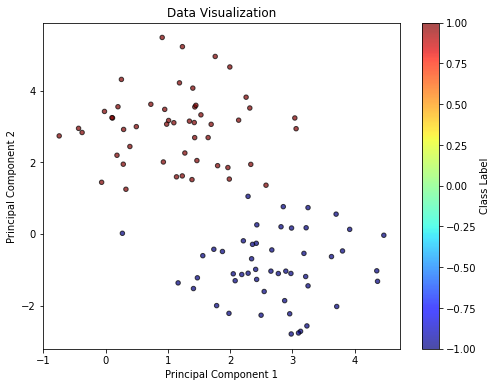

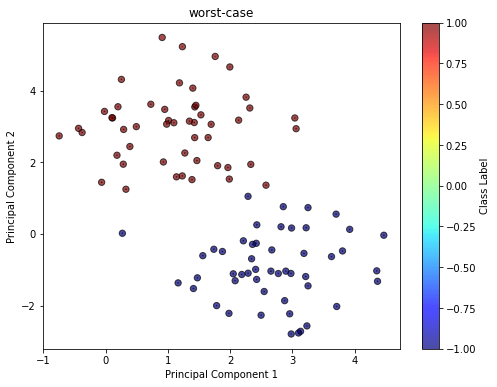

In [3]:
import numpy as np
import os
os.chdir('/Users/wty6162/Desktop/DRO_solver')
from dro.src.linear_model.Wasserstein_DRO import *

from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)
# draw_classification(X, y, title = 'Raw Data')

clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'logistic')
clf_model1.fit_intercept = False
clf_model1.update({'eps': 1.5, 'p': 'inf', 'kappa': 10})
clf_model1.fit(X, y)

worst_case_log = clf_model1.worst_distribution(X, y, 1)

draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0], worst_case_log['sample_pts'][1], weight = worst_case_log['weight'], title = 'worst-case')

In [8]:
print(np.sum(worst_case_log['weight']))

0.9999999999999999
